In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **Data Preparation**

In [ ]:
 # Load crashes dataset
 crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download'
 df_crashes = pd.read_csv(crashes_url, low_memory=False)

In [ ]:
 # Load persons dataset
 persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
 df_persons = pd.read_csv(persons_url, low_memory=False)

In [ ]:
 df_crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [ ]:
 df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [ ]:
print("Crashes shape:", df_crashes.shape)
print("Persons shape:", df_persons.shape)

Crashes shape: (2221301, 29)
Persons shape: (5822658, 21)


In [ ]:
# Column info and data types
df_crashes.info()
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221301 entries, 0 to 2221300
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
df_crashes.describe()
# New York City’s coordinates (around 40.7°N, -73.9°W).
# Most crashes are non-injury events.
# The dataset is heavily imbalanced — a small portion involve injuries or deaths.

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.978290e+06,1.978290e+06,2.218613e+06,2.218600e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06
mean,4.059071e+01,-7.368484e+01,3.280716e-01,1.585685e-03,5.955384e-02,7.842674e-04,2.915942e-02,1.262040e-04,2.347240e-01,6.454431e-04,3.264448e+06
std,2.326301e+00,4.324753e+00,7.148684e-01,4.206870e-02,2.499738e-01,2.863060e-02,1.705230e-01,1.127340e-02,6.760237e-01,2.778727e-02,1.509503e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066734e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.190778e+06
50%,4.072032e+01,-7.392676e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.745607e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.300480e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.855413e+06


/tmp/ipython-input-1928775284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BOROUGH', data=df_crashes, palette='Reds_r')


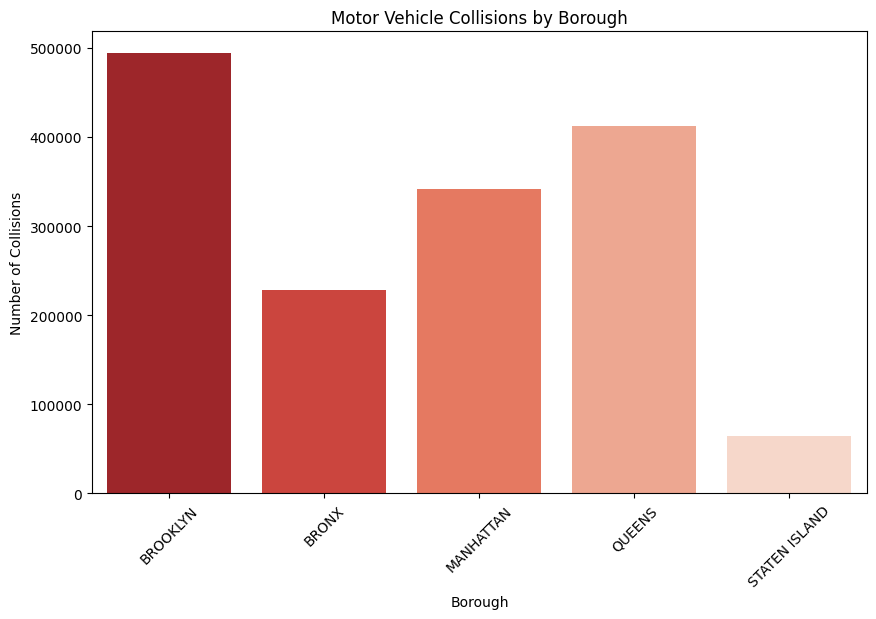

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='BOROUGH', data=df_crashes, palette='Reds_r')
plt.title('Motor Vehicle Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Detect invalid coordinates
invalid_coords = df_crashes[(df_crashes['LATITUDE'] == 0) | (df_crashes['LONGITUDE'] == 0) |
                         (df_crashes['LONGITUDE'] < -180) | (df_crashes['LONGITUDE'] > 180)]
print("Invalid coordinates:", len(invalid_coords))

Invalid coordinates: 6645


In [ ]:
#keep it as nan
invalid_coords = df_crashes[
    (df_crashes['LATITUDE'] == 0) |
    (df_crashes['LONGITUDE'] == 0) |
    (df_crashes['LATITUDE'].abs() > 90) |
    (df_crashes['LONGITUDE'].abs() > 180)
]
df_crashes = df_crashes[
    (df_crashes['LATITUDE'].between(40.49, 40.92)) &
    (df_crashes['LONGITUDE'].between(-74.27, -73.68))
]
print("Remaining invalid coordinates:", len(invalid_coords))

Remaining invalid coordinates: 0


In [ ]:
print(df_crashes['LATITUDE'].describe())
print(df_crashes['LONGITUDE'].describe())

count    1.971671e+06
mean     4.072388e+01
std      7.923045e-02
min      4.049895e+01
25%      4.066785e+01
50%      4.072060e+01
75%      4.076979e+01
max      4.091288e+01
Name: LATITUDE, dtype: float64
count    1.971671e+06
mean    -7.392009e+01
std      8.619771e-02
min     -7.425496e+01
25%     -7.397469e+01
50%     -7.392720e+01
75%     -7.386724e+01
max     -7.370055e+01
Name: LONGITUDE, dtype: float64


In [ ]:
print(df_crashes.info())
print(df_crashes.isnull().sum().sort_values(ascending=False).head(15))

<class 'pandas.core.frame.DataFrame'>
Index: 1971671 entries, 2 to 2218630
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CONTRIB

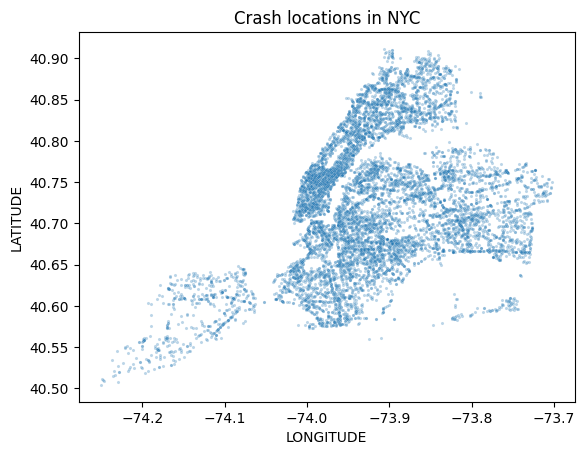

In [ ]:
sns.scatterplot(
    x='LONGITUDE', y='LATITUDE',
    data=df_crashes.sample(10000, random_state=42), s=5, alpha=0.3
)
plt.title("Crash locations in NYC")
plt.show()

In [ ]:
print(df_crashes['LATITUDE'].min(), df_crashes['LATITUDE'].max())
print(df_crashes['LONGITUDE'].min(), df_crashes['LONGITUDE'].max())

40.498947 40.912884
-74.25496 -73.70055


In [ ]:
df_crashes[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
count,1.971655e+06,1.971643e+06
mean,3.300101e-01,1.552512e-03
std,7.124292e-01,4.162561e-02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,4.300000e+01,8.000000e+00


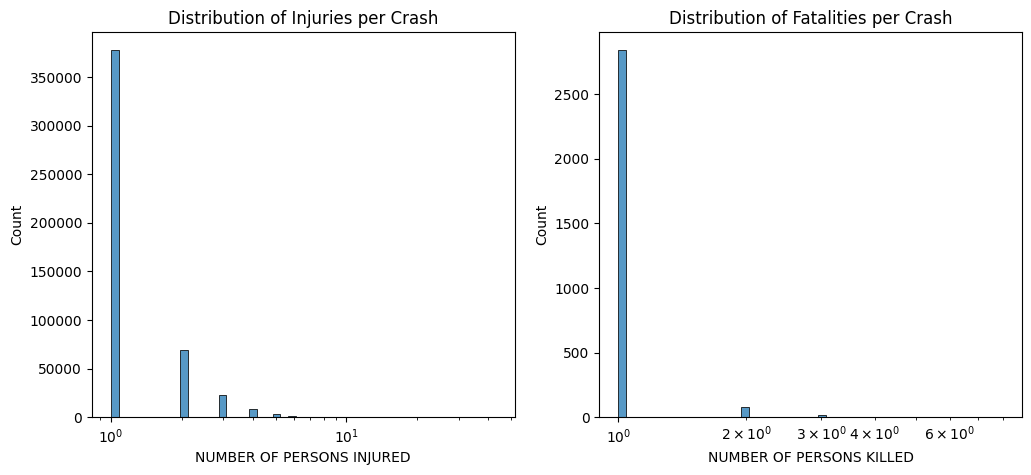

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_crashes['NUMBER OF PERSONS INJURED'], bins=50, ax=ax[0], log_scale=True)
ax[0].set_title("Distribution of Injuries per Crash")

sns.histplot(df_crashes['NUMBER OF PERSONS KILLED'], bins=50, ax=ax[1], log_scale=True)
ax[1].set_title("Distribution of Fatalities per Crash")

plt.show()

In [ ]:
df_persons.describe()
# many nulls in vechile_id

,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.813820e+06,5.813820e+06,5.572803e+06,5.164747e+06
mean,9.370330e+06,4.015355e+06,1.870136e+07,3.751295e+01
std,2.760182e+06,6.646730e+05,1.620275e+06,1.111215e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.097060e+06,3.705050e+06,1.759950e+07,2.400000e+01
50%,9.569806e+06,4.059670e+06,1.880526e+07,3.600000e+01
75%,1.187911e+07,4.437680e+06,2.001491e+07,5.100000e+01
max,1.352676e+07,4.855413e+06,2.096524e+07,9.999000e+03


In [ ]:
age_counts = df_persons.groupby('PERSON_AGE').size().reset_index(name='count').sort_values(by='PERSON_AGE')
print(age_counts.head(10))
print(age_counts.tail(10))

   PERSON_AGE  count
0      -999.0      8
1      -997.0      2
2      -996.0      1
3      -992.0      2
4      -991.0      1
5      -990.0      3
6      -989.0      1
7      -987.0      1
8      -982.0      3
9      -980.0      1
     PERSON_AGE  count
896      8041.0      1
897      8051.0      1
898      9122.0      1
899      9131.0      1
900      9151.0      1
901      9191.0      1
902      9211.0      1
903      9232.0      1
904      9262.0      1
905      9999.0    423


In [ ]:
valid_ages = df_persons[(df_persons['PERSON_AGE'] > 0) & (df_persons['PERSON_AGE'] < 99)]

In [ ]:
mean_age = valid_ages['PERSON_AGE'].mean()
median_age = valid_ages['PERSON_AGE'].median()

print("Mean age:", round(mean_age, 2))
print("Median age:", median_age)

Mean age: 40.21
Median age: 38.0


In [ ]:
df_persons.loc[(df_persons['PERSON_AGE'] <= 0) | (df_persons['PERSON_AGE'] >= 99), 'PERSON_AGE'] = median_age

In [ ]:
df_persons['PERSON_AGE'].describe()

,PERSON_AGE
count,5.164747e+06
mean,3.997099e+01
std,1.570933e+01
min,1.000000e+00
25%,2.900000e+01
50%,3.800000e+01
75%,5.100000e+01
max,9.800000e+01


In [ ]:
df_persons['PERSON_TYPE'].value_counts().head(10)
df_persons['PERSON_INJURY'].value_counts()

,count
PERSON_INJURY,
Unspecified,5082721
Injured,727583
Killed,3516


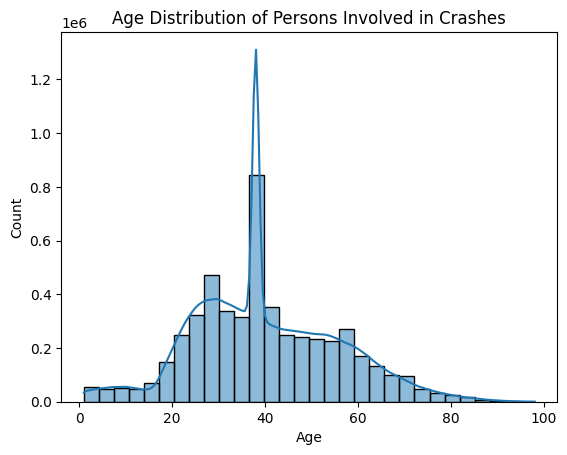

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_persons['PERSON_AGE'], bins=30, kde=True)
plt.title("Age Distribution of Persons Involved in Crashes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# **Part2**

In [ ]:
df_crashes.isnull().sum()
#can drop the rows of injured and killed
#Many crash reports don’t include all three. If the location is clear from one field, the others may be left blank.
#CONTRIBUTING FACTOR VEHICLE 1-> The main contributing factor (cause) for the first vehicle involved.
#CONTRIBUTING FACTOR VEHICLE 2-> Cause for the second vehicle.
#CONTRIBUTING FACTOR VEHICLE 3–5-> Causes for additional vehicles, if more than 2 were involved.

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,475959
ZIP CODE,476204
LATITUDE,0
LONGITUDE,0
LOCATION,0
ON STREET NAME,423077
CROSS STREET NAME,746709
OFF STREET NAME,1610635


In [ ]:
#because of haveing lang and long
df_crashes = df_crashes.drop(columns=['ZIP CODE'])

In [ ]:
!pip install geopandas shapely

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    df_crashes,
    geometry=gpd.points_from_xy(df_crashes['LONGITUDE'], df_crashes['LATITUDE']),
    crs="EPSG:4326"
)

In [ ]:
# Load NYC borough boundaries
boroughs = gpd.read_file("https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson")

# Keep only the useful columns and rename for consistency
boroughs = boroughs[['BoroName', 'geometry']].rename(columns={'BoroName': 'boro_name'})

# Perform spatial join (this may take a few minutes due to 2M+ rows)
gdf = gpd.sjoin(gdf, boroughs, how='left', predicate='within')

# Fill missing boroughs
df_crashes['BOROUGH'] = gdf['boro_name'].fillna(df_crashes['BOROUGH'])

# Check how many are still missing
missing_after = df_crashes['BOROUGH'].isnull().sum()
print(f"Remaining missing BOROUGH values: {missing_after}")

Remaining missing BOROUGH values: 8486


In [ ]:
df_crashes['BOROUGH'].value_counts()

,count
BOROUGH,
Brooklyn,602320
Queens,558398
Manhattan,412356
Bronx,292865
Staten Island,96642
QUEENS,390
BRONX,123
BROOKLYN,59
MANHATTAN,29


In [ ]:
# Standardize borough names (capitalize first letter only)
df_crashes['BOROUGH'] = df_crashes['BOROUGH'].str.title()

# Check counts again
df_crashes['BOROUGH'].value_counts()

,count
BOROUGH,
Brooklyn,602379
Queens,558788
Manhattan,412385
Bronx,292988
Staten Island,96645


In [ ]:
df_crashes['BOROUGH'].isnull().sum()

np.int64(8486)

In [ ]:
df_persons.isnull().sum()

,0
UNIQUE_ID,0
COLLISION_ID,0
CRASH_DATE,0
CRASH_TIME,0
PERSON_ID,19
PERSON_TYPE,0
PERSON_INJURY,0
VEHICLE_ID,241017
PERSON_AGE,649073
EJECTION,2824676


In [ ]:
# Check number of duplicate rows in each dataset
dup_crashes = df_crashes.duplicated().sum()
dup_persons = df_persons.duplicated().sum()

print(f"Duplicate rows in crashes dataset: {dup_crashes}")
print(f"Duplicate rows in persons dataset: {dup_persons}")

Duplicate rows in crashes dataset: 0
Duplicate rows in persons dataset: 0


In [ ]:
# Show first few duplicate rows (if any)
df_crashes[df_crashes.duplicated()].head()
df_persons[df_persons.duplicated()].head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX


# **Integeration**

In [ ]:
#connect to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Merge persons with crashes
df_merged = pd.merge(
    df_persons,
    df_crashes,
    on='COLLISION_ID',
    how='inner'  # keeps only matching collisions
)

In [ ]:
print(df_merged.shape)
df_merged.head()

In [ ]:
# Save merged dataset to Google Drive
output_path = '/content/drive/MyDrive/Data Engineering Project/nyc_crashes_merged.csv'
df_merged.to_csv(output_path, index=False)

In [ ]:
print(f"Merged dataset saved successfully at: {output_path}")
print(f"Shape of merged dataset: {df_merged.shape}")

✅ Merged dataset saved successfully at: /content/drive/MyDrive/Data Engineering Project/nyc_crashes_merged.csv
Shape of merged dataset: (5255394, 48)


In [ ]:
file_path = '/content/drive/MyDrive/Data Engineering Project/nyc_crashes_merged.csv'
df_merged = pd.read_csv(file_path)

In [ ]:
df_merged.info()

In [ ]:
df_merged.describe()

# **Transforming the Data**

# **Dropping Columns**
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [ ]:
missing_report = (
    df_merged.isnull().sum()
    .to_frame('Missing Values')
    .assign(Percent=lambda x: (x['Missing Values'] / len(df_merged) * 100).round(2))
    .sort_values(by='Missing Values', ascending=False)
)

missing_report.head(20)

- Create a new column 'NUM_VEHICLES' that counts how many vehicles are involved in each accident.
- We start with 1 because VEHICLE TYPE CODE 1 always exists.
- Add 1 for VEHICLE TYPE CODE 2 if it exists (without dropping this column).
- Also add 1 for VEHICLE TYPE CODE 3, 4, and 5 if they exist.
- Finally, drop the mostly-empty columns 3-5 to reduce sparsity, keeping VEHICLE TYPE CODE 2 for analysis.

In [ ]:
# Start counting with vehicle 1
#num of vechile -> (vechile3-5 and contributing vechile 3-5)
df_merged['NUM_VEHICLES'] = 1  # vehicle 1 always exists

# Add 1 if vehicle 2 exists
df_merged['NUM_VEHICLES'] += df_merged['VEHICLE TYPE CODE 2'].notnull().astype(int)

# Add 1 for vehicles 3-5 if they exist
df_merged['NUM_VEHICLES'] += df_merged['VEHICLE TYPE CODE 3'].notnull().astype(int)
df_merged['NUM_VEHICLES'] += df_merged['VEHICLE TYPE CODE 4'].notnull().astype(int)
df_merged['NUM_VEHICLES'] += df_merged['VEHICLE TYPE CODE 5'].notnull().astype(int)

# Optional: Drop only the mostly-empty columns 3-5, keep vehicle 2
df_merged.drop(columns=['VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'], inplace=True)


In [ ]:
df_merged.head()

In [ ]:
df_merged.drop(columns=[
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
], inplace=True)

In [ ]:
df_merged.head()

In [ ]:
# Fill NaN in CONTRIBUTING_FACTOR_1 with 'Unspecified'
df_merged['CONTRIBUTING_FACTOR_1'].fillna('Unspecified', inplace=True)

In [ ]:
# Drop CONTRIBUTING_FACTOR_2
df_merged.drop(columns=['CONTRIBUTING_FACTOR_2'], inplace=True)

In [ ]:
df_merged.drop(columns=['CROSS STREET NAME'], inplace=True)

In [ ]:
# Drop mostly empty / redundant columns
df_merged.drop(columns=['PED_ACTION', 'PED_LOCATION', 'OFF STREET NAME'], inplace=True)

In [ ]:
# Using median
#df_merged['PERSON_AGE'].fillna(df_merged['PERSON_AGE'].median(), inplace=True)

# OR using mean
df_merged['PERSON_AGE'].fillna(df_merged['PERSON_AGE'].mean(), inplace=True)

In [ ]:
missing_report = (
    df_merged.isnull().sum()
    .to_frame('Missing Values')
    .assign(Percent=lambda x: (x['Missing Values'] / len(df_merged) * 100).round(2))
    .sort_values(by='Missing Values', ascending=False)
)

missing_report.head(20)

In [ ]:
# Folder path
folder_path = '/content/drive/MyDrive/Data Engineering Project/Data after some preproceessing'
os.makedirs(folder_path, exist_ok=True)  # create folder if it doesn't exist

# File path
save_path = os.path.join(folder_path, 'nyc_crashes_cleaned.csv')

# Save df_merged
df_merged.to_csv(save_path, index=False)

print(f"Preprocessed CSV saved at: {save_path}")

# **Preprocessing after integeration**

In [ ]:
file_path = "/content/drive/MyDrive/Data Engineering Project/Data after some preproceessing/nyc_crashes_cleaned.csv"

In [ ]:
df = pd.read_csv(file_path)
df.head(20)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,39.98989,NaN,...,0,0,0,0,1,0,Failure to Yield Right-of-Way,Sedan,Sedan,2
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.00000,Not Ejected,...,0,0,0,0,0,0,Failure to Yield Right-of-Way,Sedan,Sedan,2
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.00000,NaN,...,0,0,0,0,0,0,Following Too Closely,Station Wagon/Sport Utility Vehicle,Taxi,2
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,39.98989,NaN,...,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle,Concrete Mixer,2
4,10253606,4230743,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.00000,Not Ejected,...,0,0,0,0,2,0,Failure to Yield Right-of-Way,Sedan,Sedan,2
5,10251336,4230047,10/26/2019,16:45,21064a07-a945-49d0-af97-5446801b20ce,Occupant,Unspecified,19142198.0,41.00000,NaN,...,0,0,0,0,0,0,Traffic Control Disregarded,Sedan,Sedan,2
6,10248708,4229547,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.00000,NaN,...,2,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,NaN,1
7,10250179,4229808,10/26/2019,13:04,c3fc715e-203f-462d-9e8b-6a41fc378703,Occupant,Unspecified,19141630.0,36.00000,Not Ejected,...,0,0,0,0,1,0,Unspecified,Sedan,Sedan,2
8,10253792,4230915,10/24/2019,8:20,793ac6c6-cbc7-4ab3-ab95-09f9312f1123,Occupant,Unspecified,19143438.0,39.98989,NaN,...,1,0,0,0,0,0,Failure to Yield Right-of-Way,Pick-up Truck,NaN,1
9,10253588,4230737,10/24/2019,0:41,48a63e6b-b696-4a33-935c-05b4c6b70867,Occupant,Unspecified,19143334.0,30.00000,Not Ejected,...,0,0,0,0,0,0,Following Too Closely,Station Wagon/Sport Utility Vehicle,Sedan,2


In [ ]:
df['PERSON_AGE'] = df['PERSON_AGE'].round().astype('Int64')
df['VEHICLE_ID'] = df['VEHICLE_ID'].round().astype('Int64')

In [ ]:
df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108,40,NaN,...,0,0,0,0,1,0,Failure to Yield Right-of-Way,Sedan,Sedan,2
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075,33,Not Ejected,...,0,0,0,0,0,0,Failure to Yield Right-of-Way,Sedan,Sedan,2
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133,55,NaN,...,0,0,0,0,0,0,Following Too Closely,Station Wagon/Sport Utility Vehicle,Taxi,2
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,<NA>,40,NaN,...,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle,Concrete Mixer,2
4,10253606,4230743,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343,27,Not Ejected,...,0,0,0,0,2,0,Failure to Yield Right-of-Way,Sedan,Sedan,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255389,13526547,4855289,11/04/2025,23:10,75d61f45-3245-4cda-9f3a-5132eb641ee5,Occupant,Injured,20965125,28,Not Ejected,...,0,0,0,0,2,0,Failure to Yield Right-of-Way,Pick-up Truck,Sedan,2
5255390,13525125,4855000,11/04/2025,12:57,0fcad033-b74e-406c-86f5-400e46a176a5,Pedestrian,Injured,<NA>,74,NaN,...,1,0,0,0,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle,NaN,1
5255391,13524863,4854898,11/04/2025,20:10,0c96b6f2-d93d-4812-9413-c72c19499eab,Occupant,Unspecified,20964213,2,Not Ejected,...,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Moped,2
5255392,13526409,4855251,11/01/2025,13:28,19214131-1d88-46fd-aa3c-74acf65a2057,Occupant,Unspecified,20965067,79,Not Ejected,...,0,0,0,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle,Motorcycle,2


In [ ]:
df['VEHICLE TYPE CODE 1'].value_counts().head(40)

,count
VEHICLE TYPE CODE 1,
Sedan,2253275
Station Wagon/Sport Utility Vehicle,1809486
Taxi,207555
Pick-up Truck,136755
Bus,126676
4 dr sedan,118033
Box Truck,95497
PASSENGER VEHICLE,90704
Tractor Truck Diesel,38931


In [ ]:
vehicle_normalization = {
    # Sedan
    "Sedan": "Sedan",
    "4 dr sedan": "Sedan",
    "2 dr sedan": "Sedan",

    # SUV
    "Station Wagon/Sport Utility Vehicle": "SUV",
    "SPORT UTILITY / STATION WAGON": "SUV",

    # Taxi
    "Taxi": "Taxi",
    "TAXI": "Taxi",

    # Van
    "Van": "Van",
    "VAN": "Van",
    "van": "Van",

    # Bus
    "Bus": "Bus",
    "BUS": "Bus",

    # Ambulance
    "Ambulance": "Ambulance",
    "AMBULANCE": "Ambulance",

    # Motorcycle / Scooters
    "Motorcycle": "Motorcycle",
    "MOTORCYCLE": "Motorcycle",
    "Motorscooter": "Motorcycle",
    "Motorbike": "Motorcycle",
    "Moped": "Motorcycle",
    "E-Bike": "Motorcycle",
    "E-Scooter": "Motorcycle",

    # Bicycle
    "Bike": "Bicycle",
    "BICYCLE": "Bicycle",

    # Pickups
    "Pick-up Truck": "Pickup Truck",
    "PK": "Pickup Truck",

    # Trucks
    "Box Truck": "Truck",
    "Dump": "Truck",
    "Garbage or Refuse": "Truck",
    "Flat Bed": "Truck",
    "Flat Rack": "Truck",
    "Tow Truck / Wrecker": "Truck",
    "Chassis Cab": "Truck",
    "Refrigerated Van": "Truck",
    "Tractor Truck Diesel": "Truck",
    "Tractor Truck Gasoline": "Truck",
    "Tanker": "Truck",
    "Concrete Mixer": "Truck",

    # Others
    "PASSENGER VEHICLE": "Passenger Vehicle",
    "Convertible": "Convertible",
    "Carry All": "Carry All",
    "OTHER": "Other",
    "Other": "Other",
    "UNKNOWN": "Unknown",
}

In [ ]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].replace(vehicle_normalization)

In [ ]:
df['VEHICLE TYPE CODE 1'].value_counts().head(40)

,count
VEHICLE TYPE CODE 1,
Sedan,2378819
SUV,1848210
Taxi,214989
Truck,193357
Pickup Truck,146792
Bus,129622
Passenger Vehicle,90704
Motorcycle,54736
Van,42049


In [ ]:
df['VEHICLE TYPE CODE 2'].value_counts().head(40)

,count
VEHICLE TYPE CODE 2,
Sedan,1815969
Station Wagon/Sport Utility Vehicle,1480712
Taxi,162556
Pick-up Truck,132321
Bike,115792
Box Truck,113714
Bus,109795
4 dr sedan,98215
PASSENGER VEHICLE,60877


In [ ]:
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].replace(vehicle_normalization)

In [ ]:
df['VEHICLE TYPE CODE 2'].value_counts().head(20)

,count
VEHICLE TYPE CODE 2,
Sedan,1920307
SUV,1506014
Truck,217136
Taxi,166226
Pickup Truck,141656
Bicycle,129389
Bus,111464
Motorcycle,92290
Passenger Vehicle,60877


In [ ]:
factor_map = {
    # Traffic Recklessness
    'Backing Unsafely': 'Traffic Recklessness',
    'Unsafe Speed': 'Traffic Recklessness',
    'Passing or Lane Usage Improper': 'Traffic Recklessness',
    'Turning Improperly': 'Traffic Recklessness',
    'Following Too Closely': 'Traffic Recklessness',
    'Passing Too Closely': 'Traffic Recklessness',
    'Outside Car Distraction': 'Traffic Recklessness',
    'Steering Failure': 'Traffic Recklessness',
    'Reaction to Uninvolved Vehicle': 'Traffic Recklessness',
    'Traffic Control Disregarded': 'Traffic Recklessness',
    'Failure to Yield Right-of-Way': 'Traffic Recklessness',
    'Aggressive Driving/Road Rage': 'Traffic Recklessness',
    'Unsafe Lane Changing': 'Traffic Recklessness',
    'Driver Inexperience': 'Traffic Recklessness',

    # Driver Inattention / Distraction
    'Passenger Distraction': 'Driver Inattention/Distraction',
    'Failure to Keep Right': 'Driver Inattention/Distraction',
    'Eating or Drinking': 'Driver Inattention/Distraction',
    'Animals Action': 'Driver Inattention/Distraction',
    'Using On Board Navigation Device': 'Driver Inattention/Distraction',
    'Reaction to Other Uninvolved Vehicle': 'Driver Inattention/Distraction',
    'Cell Phone (hands-free)': 'Driver Inattention/Distraction',
    'Cell Phone (hand-Held)': 'Driver Inattention/Distraction',
    'Other Electronic Device': 'Driver Inattention/Distraction',
    'Cell Phone (hand-held)': 'Driver Inattention/Distraction',
    'Texting': 'Driver Inattention/Distraction',
    'Listening/Using Headphones': 'Driver Inattention/Distraction',
    'Fatigued/Drowsy': 'Driver Inattention/Distraction',
    'Fell Asleep': 'Driver Inattention/Distraction',

    # Car Defects
    'Brakes Defective': 'Car Defects',
    'Tinted Windows': 'Car Defects',
    'Tire Failure/Inadequate': 'Car Defects',
    'Tow Hitch Defective': 'Car Defects',
    'Headlights Defective': 'Car Defects',
    'Accelerator Defective': 'Car Defects',
    'Windshield Inadequate': 'Car Defects',
    'Driverless/Runaway Vehicle': 'Car Defects',
    'Oversized Vehicle': 'Car Defects',

    # Road Defects
    'Lane Marking Improper/Inadequate': 'Road Defects',
    'View Obstructed/Limited': 'Road Defects',
    'Pavement Slippery': 'Road Defects',
    'Pavement Defective': 'Road Defects',
    'Other Lighting Defects': 'Road Defects',
    'Obstruction/Debris': 'Road Defects',
    'Traffic Control Device Improper/Non-Working': 'Road Defects',
    'Shoulders Defective/Improper': 'Road Defects',
    'Glare': 'Road Defects',

    # Illness / physical
    'Illnes': 'Illness',
    'Illness': 'Illness',
    'Lost Consciousness': 'Illness',
    'Physical Disability': 'Illness',
    'Prescription Medication': 'Illness',

    # Drugs & Alcohol
    'Drugs (illegal)': 'Drugs (Illegal)',
    'Drugs (Illegal)': 'Drugs (Illegal)',
    'Alcohol Involvement': 'Drugs (Illegal)',

    # Outside Errors
    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Outside Error',
    'Vehicle Vandalism': 'Outside Error',
    'Other Vehicular': 'Outside Error',
}

In [ ]:
df = df.replace({"CONTRIBUTING FACTOR VEHICLE 1": factor_map})

In [ ]:
df = df[~df['CONTRIBUTING FACTOR VEHICLE 1'].isin(['80', '1', 'Unspecified'])]
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unknown')

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Traffic Recklessness', 'Driver Inattention/Distraction',
       'Drugs (Illegal)', 'Outside Error', 'Road Defects', 'Unknown',
       'Car Defects', 'Illness'], dtype=object)

In [ ]:
text_cols = df.select_dtypes(include=['object']).columns
text_cols

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY',
       'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'CONTRIBUTING_FACTOR_1',
       'PERSON_SEX', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LOCATION',
       'ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'],
      dtype='object')

In [ ]:
for col in text_cols:
    df[col] = df[col].str.lower()

In [ ]:
df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,occupant,unspecified,19141108,40,NaN,...,0,0,0,0,1,0,traffic recklessness,sedan,sedan,2
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,occupant,unspecified,19144075,33,not ejected,...,0,0,0,0,0,0,traffic recklessness,sedan,sedan,2
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,occupant,unspecified,19143133,55,NaN,...,0,0,0,0,0,0,traffic recklessness,suv,taxi,2
4,10253606,4230743,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,occupant,injured,19143343,27,not ejected,...,0,0,0,0,2,0,traffic recklessness,sedan,sedan,2
5,10251336,4230047,10/26/2019,16:45,21064a07-a945-49d0-af97-5446801b20ce,occupant,unspecified,19142198,41,NaN,...,0,0,0,0,0,0,traffic recklessness,sedan,sedan,2


In [ ]:
df[["LATITUDE", "LONGITUDE", "LOCATION"]].head(30)

,LATITUDE,LONGITUDE,LOCATION
0,40.691080,-73.729110,"(40.69108, -73.72911)"
1,40.703957,-73.895700,"(40.703957, -73.8957)"
2,40.721040,-73.954300,"(40.72104, -73.9543)"
4,40.695847,-73.908806,"(40.695847, -73.908806)"
5,40.638603,-73.948270,"(40.638603, -73.94827)"
6,40.832573,-73.910520,"(40.832573, -73.91052)"
8,40.726116,-74.001600,"(40.726116, -74.0016)"
9,40.697310,-73.932274,"(40.69731, -73.932274)"
11,40.758305,-73.855610,"(40.758305, -73.85561)"
12,40.808907,-73.946075,"(40.808907, -73.946075)"


In [ ]:
df['LOCATION'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-3016834732.py:1: SyntaxWarning: invalid escape sequence '\('
  df['LOCATION'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()


,count
LOCATION,
False,4154875


In [ ]:
df[~df['LOCATION'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-1996278918.py:1: SyntaxWarning: invalid escape sequence '\('
  df[~df['LOCATION'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,occupant,unspecified,19141108,40,NaN,...,0,0,0,0,1,0,traffic recklessness,sedan,sedan,2
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,occupant,unspecified,19144075,33,not ejected,...,0,0,0,0,0,0,traffic recklessness,sedan,sedan,2
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,occupant,unspecified,19143133,55,NaN,...,0,0,0,0,0,0,traffic recklessness,suv,taxi,2
4,10253606,4230743,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,occupant,injured,19143343,27,not ejected,...,0,0,0,0,2,0,traffic recklessness,sedan,sedan,2
5,10251336,4230047,10/26/2019,16:45,21064a07-a945-49d0-af97-5446801b20ce,occupant,unspecified,19142198,41,NaN,...,0,0,0,0,0,0,traffic recklessness,sedan,sedan,2
6,10248708,4229547,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,pedestrian,injured,<NA>,24,NaN,...,2,0,0,0,0,0,driver inattention/distraction,suv,NaN,1
8,10253792,4230915,10/24/2019,8:20,793ac6c6-cbc7-4ab3-ab95-09f9312f1123,occupant,unspecified,19143438,40,NaN,...,1,0,0,0,0,0,traffic recklessness,pickup truck,NaN,1
9,10253588,4230737,10/24/2019,0:41,48a63e6b-b696-4a33-935c-05b4c6b70867,occupant,unspecified,19143334,30,not ejected,...,0,0,0,0,0,0,traffic recklessness,suv,sedan,2
11,10254506,4230701,10/24/2019,4:40,ee346dc7-1239-4abb-80c4-f971db657891,occupant,unspecified,19143798,40,NaN,...,0,0,0,0,0,0,traffic recklessness,suv,sedan,2
12,10252623,4230916,10/24/2019,1:44,c9aed1ae-85a6-4a7e-b8d0-107efaa7d40c,occupant,unspecified,19142851,40,NaN,...,0,0,0,0,1,0,drugs (illegal),truck,sedan,4


In [ ]:
# Drop the redundant LOCATION column
df.drop(columns=['LOCATION'], inplace=True)

# **Data Type**

In [ ]:
df[['CRASH_DATE', 'CRASH_TIME']].head()

,CRASH_DATE,CRASH_TIME
0,10/26/2019,9:43
1,10/25/2019,15:15
2,10/26/2019,17:55
4,10/24/2019,19:15
5,10/26/2019,16:45


In [ ]:
df['CRASH_TIME'] = pd.to_datetime(df.CRASH_TIME)
df['HOUR'] = df['CRASH_TIME'].dt.hour
df.head()

/tmp/ipython-input-4188842937.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH_TIME'] = pd.to_datetime(df.CRASH_TIME)


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES,HOUR
0,10249006,4229554,10/26/2019,2025-11-16 09:43:00,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,occupant,unspecified,19141108,40,NaN,...,0,0,0,1,0,traffic recklessness,sedan,sedan,2,9
1,10255054,4230587,10/25/2019,2025-11-16 15:15:00,4629e500-a73e-48dc-b8fb-53124d124b80,occupant,unspecified,19144075,33,not ejected,...,0,0,0,0,0,traffic recklessness,sedan,sedan,2,15
2,10253177,4230550,10/26/2019,2025-11-16 17:55:00,ae48c136-1383-45db-83f4-2a5eecfb7cff,occupant,unspecified,19143133,55,NaN,...,0,0,0,0,0,traffic recklessness,suv,taxi,2,17
4,10253606,4230743,10/24/2019,2025-11-16 19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,occupant,injured,19143343,27,not ejected,...,0,0,0,2,0,traffic recklessness,sedan,sedan,2,19
5,10251336,4230047,10/26/2019,2025-11-16 16:45:00,21064a07-a945-49d0-af97-5446801b20ce,occupant,unspecified,19142198,41,NaN,...,0,0,0,0,0,traffic recklessness,sedan,sedan,2,16


In [ ]:
print(df.dtypes)

UNIQUE_ID                                 int64
COLLISION_ID                              int64
CRASH_DATE                               object
CRASH_TIME                       datetime64[ns]
PERSON_ID                                object
PERSON_TYPE                              object
PERSON_INJURY                            object
VEHICLE_ID                                Int64
PERSON_AGE                                Int64
EJECTION                                 object
EMOTIONAL_STATUS                         object
BODILY_INJURY                            object
POSITION_IN_VEHICLE                      object
SAFETY_EQUIPMENT                         object
COMPLAINT                                object
PED_ROLE                                 object
CONTRIBUTING_FACTOR_1                    object
PERSON_SEX                               object
CRASH DATE                               object
CRASH TIME                               object
BOROUGH                                 

# **Categorizing: Making a Seasons Variable**

In [ ]:
# Convert CRASH_DATE to datetime
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

# Now you can extract month, day, etc.
df['MONTH'] = df['CRASH_DATE'].dt.month
df['DAY'] = df['CRASH_DATE'].dt.day

# Example: show first 30 months
df['MONTH'].head(30)

,MONTH
0,10
1,10
2,10
4,10
5,10
6,10
8,10
9,10
11,10
12,10


In [ ]:
# Define a function to map month to season
def season(crash_date):
    if crash_date.month in [3, 4, 5]:
        return 'Spring'
    elif crash_date.month in [6, 7, 8]:
        return 'Summer'
    elif crash_date.month in [9, 10, 11]:
        return 'Autumn'
    elif crash_date.month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'Unspecified'

# Apply the function to create the season column
df['season'] = df['CRASH_DATE'].apply(season)

In [ ]:
df['season'].value_counts()

,count
season,
Summer,1128322
Autumn,1090077
Spring,1018185
Winter,918291


In [ ]:
df.shape

(4154875, 40)

In [ ]:
# Count missing values per column
missing_values = df.isna().sum()

# Percentage of missing values per column
missing_percent = (df.isna().sum() / len(df)) * 100

# Combine into one table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent': missing_percent
}).sort_values(by='Percent', ascending=False)

missing_summary

,Missing Values,Percent
SAFETY_EQUIPMENT,2126102,51.171263
EJECTION,1982568,47.716670
POSITION_IN_VEHICLE,1982342,47.711231
EMOTIONAL_STATUS,1914274,46.072962
BODILY_INJURY,1914250,46.072385
COMPLAINT,1914243,46.072216
ON STREET NAME,880405,21.189687
VEHICLE TYPE CODE 2,473630,11.399380
PERSON_SEX,408447,9.830548
VEHICLE_ID,156368,3.763483


- ON STREET NAME can possibly be dropped since you have LATITUDE and LONGITUDE.
- VEHICLE TYPE CODE 2 and PERSON_SEX could be filled if needed (for example, "Unknown").

In [ ]:
# Fill missing values for some important columns
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].fillna('Unknown')
df['PERSON_SEX'] = df['PERSON_SEX'].fillna('Unknown')

In [ ]:
df['SAFETY_EQUIPMENT'].value_counts(dropna=False)

,count
SAFETY_EQUIPMENT,
NaN,2126102
lap belt & harness,1288915
unknown,342281
lap belt,292206
child restraint only,35049
air bag deployed/lap belt/harness,15518
helmet (motorcycle only),12574
other,10222
harness,9376


In [ ]:
df['SAFETY_USED'] = df['SAFETY_EQUIPMENT'].apply(lambda x: 0 if x in ['Unknown', 'NaN', '-'] else 1)

In [ ]:
df['EJECTION'].value_counts(dropna=False)

,count
EJECTION,
not ejected,2133331
NaN,1982568
ejected,22706
partially ejected,9752
does not apply,5294
trapped,1089
unknown,135


In [ ]:
df.drop(columns=['EJECTION'], inplace=True)

In [ ]:
df.head(20)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EMOTIONAL_STATUS,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES,HOUR,MONTH,DAY,season,SAFETY_USED
0,10249006,4229554,2019-10-26,2025-11-16 09:43:00,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,occupant,unspecified,19141108.0,40,NaN,...,0,traffic recklessness,sedan,sedan,2,9,10,26,Autumn,1
1,10255054,4230587,2019-10-25,2025-11-16 15:15:00,4629e500-a73e-48dc-b8fb-53124d124b80,occupant,unspecified,19144075.0,33,does not apply,...,0,traffic recklessness,sedan,sedan,2,15,10,25,Autumn,1
2,10253177,4230550,2019-10-26,2025-11-16 17:55:00,ae48c136-1383-45db-83f4-2a5eecfb7cff,occupant,unspecified,19143133.0,55,NaN,...,0,traffic recklessness,suv,taxi,2,17,10,26,Autumn,1
3,10253606,4230743,2019-10-24,2025-11-16 19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,occupant,injured,19143343.0,27,conscious,...,0,traffic recklessness,sedan,sedan,2,19,10,24,Autumn,1
4,10251336,4230047,2019-10-26,2025-11-16 16:45:00,21064a07-a945-49d0-af97-5446801b20ce,occupant,unspecified,19142198.0,41,NaN,...,0,traffic recklessness,sedan,sedan,2,16,10,26,Autumn,1
5,10248708,4229547,2019-10-26,2025-11-16 01:15:00,a8904763-2870-42f3-865c-b53d8e5156e2,pedestrian,injured,NaN,24,conscious,...,0,driver inattention/distraction,suv,Unknown,1,1,10,26,Autumn,1
6,10253792,4230915,2019-10-24,2025-11-16 08:20:00,793ac6c6-cbc7-4ab3-ab95-09f9312f1123,occupant,unspecified,19143438.0,40,NaN,...,0,traffic recklessness,pickup truck,Unknown,1,8,10,24,Autumn,1
7,10253588,4230737,2019-10-24,2025-11-16 00:41:00,48a63e6b-b696-4a33-935c-05b4c6b70867,occupant,unspecified,19143334.0,30,does not apply,...,0,traffic recklessness,suv,sedan,2,0,10,24,Autumn,1
8,10254506,4230701,2019-10-24,2025-11-16 04:40:00,ee346dc7-1239-4abb-80c4-f971db657891,occupant,unspecified,19143798.0,40,NaN,...,0,traffic recklessness,suv,sedan,2,4,10,24,Autumn,1
9,10252623,4230916,2019-10-24,2025-11-16 01:44:00,c9aed1ae-85a6-4a7e-b8d0-107efaa7d40c,occupant,unspecified,19142851.0,40,NaN,...,0,drugs (illegal),truck,sedan,4,1,10,24,Autumn,1


In [ ]:
# Folder path
folder_path = '/content/drive/MyDrive/Data Engineering Project/Data after some preproceessing'
os.makedirs(folder_path, exist_ok=True)  # create folder if it doesn't exist

# File path
save_path = os.path.join(folder_path, 'crashes_cleaned.csv')

# Save df_merged
df.to_csv(save_path, index=False)

print(f"Preprocessed CSV saved at: {save_path}")

Preprocessed CSV saved at: /content/drive/MyDrive/Data Engineering Project/Data after some preproceessing/crashes_cleaned.csv


# **The website**

In [ ]:
!pip install dash
!pip install dash_bootstrap_components
!pip install flask_caching
!pip install jupyter-dash plotly pandas

In [ ]:
import os
import re
import sys
import pandas as pd
from dash import Dash, html, dcc, Input, Output, State, callback_context
import plotly.express as px
from flask_caching import Cache
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import sys
from jupyter_dash import JupyterDash

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Data Engineering Project/Data after some preproceessing/crashes_cleaned.csv"

In [ ]:
df = pd.read_csv(DATA_PATH)

In [ ]:
df.head(10)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EMOTIONAL_STATUS,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES,HOUR,MONTH,DAY,season,SAFETY_USED
0,10249006,4229554,2019-10-26,2025-11-16 09:43:00,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,occupant,unspecified,19141108.0,40,NaN,...,0,traffic recklessness,sedan,sedan,2,9,10,26,Autumn,1
1,10255054,4230587,2019-10-25,2025-11-16 15:15:00,4629e500-a73e-48dc-b8fb-53124d124b80,occupant,unspecified,19144075.0,33,does not apply,...,0,traffic recklessness,sedan,sedan,2,15,10,25,Autumn,1
2,10253177,4230550,2019-10-26,2025-11-16 17:55:00,ae48c136-1383-45db-83f4-2a5eecfb7cff,occupant,unspecified,19143133.0,55,NaN,...,0,traffic recklessness,suv,taxi,2,17,10,26,Autumn,1
3,10253606,4230743,2019-10-24,2025-11-16 19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,occupant,injured,19143343.0,27,conscious,...,0,traffic recklessness,sedan,sedan,2,19,10,24,Autumn,1
4,10251336,4230047,2019-10-26,2025-11-16 16:45:00,21064a07-a945-49d0-af97-5446801b20ce,occupant,unspecified,19142198.0,41,NaN,...,0,traffic recklessness,sedan,sedan,2,16,10,26,Autumn,1
5,10248708,4229547,2019-10-26,2025-11-16 01:15:00,a8904763-2870-42f3-865c-b53d8e5156e2,pedestrian,injured,NaN,24,conscious,...,0,driver inattention/distraction,suv,Unknown,1,1,10,26,Autumn,1
6,10253792,4230915,2019-10-24,2025-11-16 08:20:00,793ac6c6-cbc7-4ab3-ab95-09f9312f1123,occupant,unspecified,19143438.0,40,NaN,...,0,traffic recklessness,pickup truck,Unknown,1,8,10,24,Autumn,1
7,10253588,4230737,2019-10-24,2025-11-16 00:41:00,48a63e6b-b696-4a33-935c-05b4c6b70867,occupant,unspecified,19143334.0,30,does not apply,...,0,traffic recklessness,suv,sedan,2,0,10,24,Autumn,1
8,10254506,4230701,2019-10-24,2025-11-16 04:40:00,ee346dc7-1239-4abb-80c4-f971db657891,occupant,unspecified,19143798.0,40,NaN,...,0,traffic recklessness,suv,sedan,2,4,10,24,Autumn,1
9,10252623,4230916,2019-10-24,2025-11-16 01:44:00,c9aed1ae-85a6-4a7e-b8d0-107efaa7d40c,occupant,unspecified,19142851.0,40,NaN,...,0,drugs (illegal),truck,sedan,4,1,10,24,Autumn,1


In [ ]:
# Check your Python executable path
print(sys.executable)

/usr/bin/python3


## Design the layout ##

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Engineering Project/Data after some preproceessing/crashes_cleaned.csv")

In [ ]:
df[['CRASH_DATE', 'CRASH_TIME']].head()
df['CRASH_TIME'] = pd.to_datetime(df.CRASH_TIME)
df['HOUR'] = df['CRASH_TIME'].dt.hour
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['year'] = df['CRASH DATE'].dt.year
df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EMOTIONAL_STATUS,...,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES,HOUR,MONTH,DAY,season,SAFETY_USED,year
0,10249006,4229554,2019-10-26,2025-11-16 09:43:00,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,occupant,unspecified,19141108.0,40,NaN,...,traffic recklessness,sedan,sedan,2,9,10,26,Autumn,1,2019
1,10255054,4230587,2019-10-25,2025-11-16 15:15:00,4629e500-a73e-48dc-b8fb-53124d124b80,occupant,unspecified,19144075.0,33,does not apply,...,traffic recklessness,sedan,sedan,2,15,10,25,Autumn,1,2019
2,10253177,4230550,2019-10-26,2025-11-16 17:55:00,ae48c136-1383-45db-83f4-2a5eecfb7cff,occupant,unspecified,19143133.0,55,NaN,...,traffic recklessness,suv,taxi,2,17,10,26,Autumn,1,2019
3,10253606,4230743,2019-10-24,2025-11-16 19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,occupant,injured,19143343.0,27,conscious,...,traffic recklessness,sedan,sedan,2,19,10,24,Autumn,1,2019
4,10251336,4230047,2019-10-26,2025-11-16 16:45:00,21064a07-a945-49d0-af97-5446801b20ce,occupant,unspecified,19142198.0,41,NaN,...,traffic recklessness,sedan,sedan,2,16,10,26,Autumn,1,2019


# **Website creation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
!pip install flask tensorflow pillow numpy flask-ngrok

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Data Engineering Project/Data after some preproceessing/crashes_cleaned.csv"

df = pd.read_csv(file_path)

df.head()


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EMOTIONAL_STATUS,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,NUM_VEHICLES,HOUR,MONTH,DAY,season,SAFETY_USED
0,10249006,4229554,2019-10-26,2025-11-16 09:43:00,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,occupant,unspecified,19141108.0,40,NaN,...,0,traffic recklessness,sedan,sedan,2,9,10,26,Autumn,1
1,10255054,4230587,2019-10-25,2025-11-16 15:15:00,4629e500-a73e-48dc-b8fb-53124d124b80,occupant,unspecified,19144075.0,33,does not apply,...,0,traffic recklessness,sedan,sedan,2,15,10,25,Autumn,1
2,10253177,4230550,2019-10-26,2025-11-16 17:55:00,ae48c136-1383-45db-83f4-2a5eecfb7cff,occupant,unspecified,19143133.0,55,NaN,...,0,traffic recklessness,suv,taxi,2,17,10,26,Autumn,1
3,10253606,4230743,2019-10-24,2025-11-16 19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,occupant,injured,19143343.0,27,conscious,...,0,traffic recklessness,sedan,sedan,2,19,10,24,Autumn,1
4,10251336,4230047,2019-10-26,2025-11-16 16:45:00,21064a07-a945-49d0-af97-5446801b20ce,occupant,unspecified,19142198.0,41,NaN,...,0,traffic recklessness,sedan,sedan,2,16,10,26,Autumn,1


# **Load Data**

In [ ]:
df["CRASH_DATE"] = pd.to_datetime(df["CRASH_DATE"], errors="coerce")
df["CRASH_TIME"] = pd.to_datetime(df["CRASH_TIME"], errors="coerce").dt.time
df["YEAR"] = df["CRASH_DATE"].dt.year
df["MONTH"] = df["CRASH_DATE"].dt.month
df["DAY"] = df["CRASH_DATE"].dt.day
df["HOUR"] = pd.to_datetime(df["CRASH_TIME"], errors="coerce").dt.hour

In [ ]:
df_crash = df.dropna(subset=["LATITUDE", "LONGITUDE"])

cat_cols = df_crash.select_dtypes(include="object").columns
for col in cat_cols:
    df_crash[col] = df_crash[col].fillna("Unknown")

In [ ]:
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

df_crash = handle_outliers(df_crash, "PERSON_AGE")

In [ ]:
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

df_crash = handle_outliers(df_crash, "PERSON_AGE")

# **Outlier Detection for PERSON_AGE**

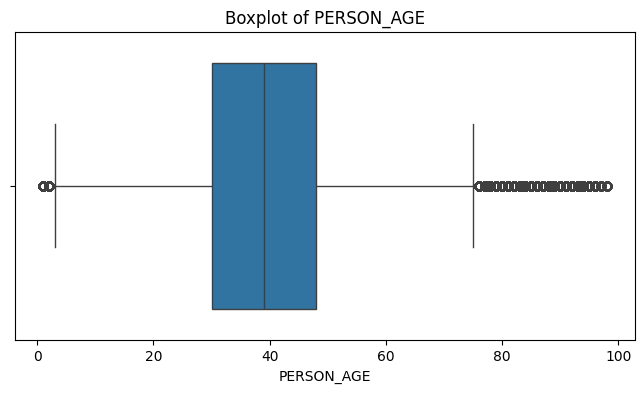

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['PERSON_AGE'])
plt.title("Boxplot of PERSON_AGE")
plt.show()


In [ ]:
Q1 = df['PERSON_AGE'].quantile(0.25)
Q3 = df['PERSON_AGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(3.0), np.float64(75.0))

In [ ]:
outliers = df[(df['PERSON_AGE'] < lower_bound) | (df['PERSON_AGE'] > upper_bound)]
outliers.shape

(83693, 40)

In [ ]:
df['PERSON_AGE'] = df['PERSON_AGE'].clip(lower=lower_bound, upper=upper_bound)

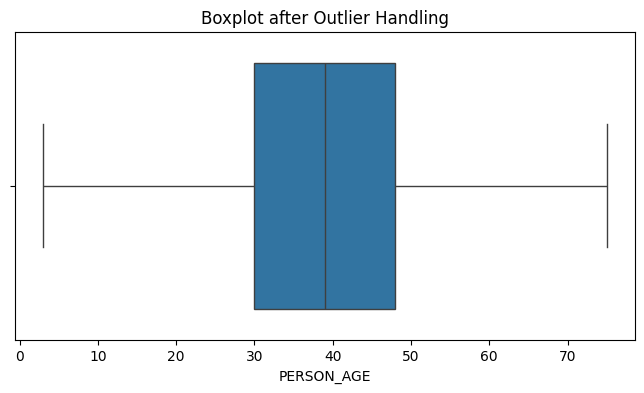

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['PERSON_AGE'])
plt.title("Boxplot after Outlier Handling")
plt.show()

# **Daily Crash Trend Analysis**

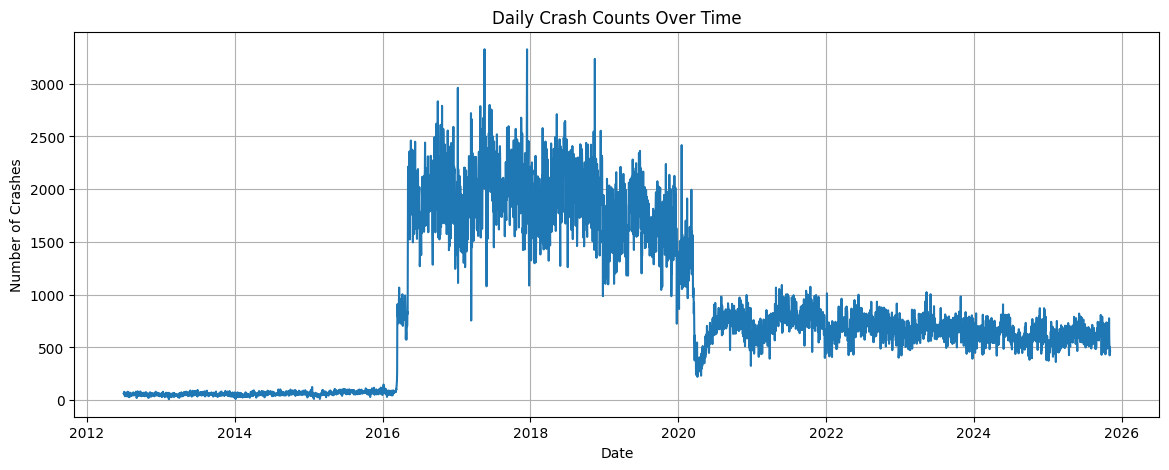

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime if needed
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

daily_counts = df['CRASH_DATE'].value_counts().sort_index()

plt.figure(figsize=(14,5))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.title("Daily Crash Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()

# **Crash Distribution Across NYC Boroughs**

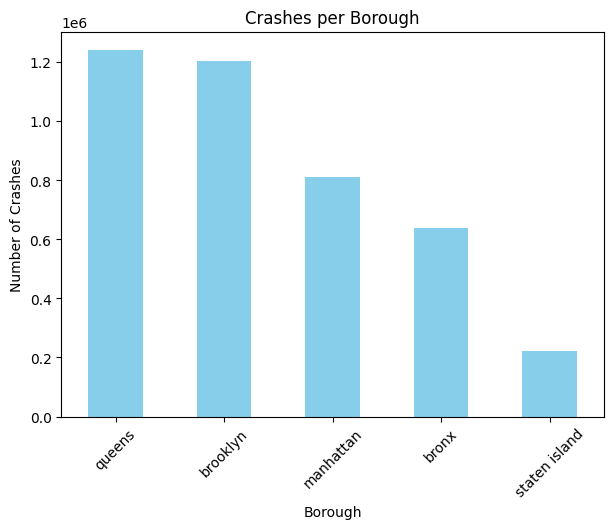

In [ ]:
plt.figure(figsize=(7,5))
df['BOROUGH'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Crashes per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.show()

# **Total Injuries by Hour of Day**

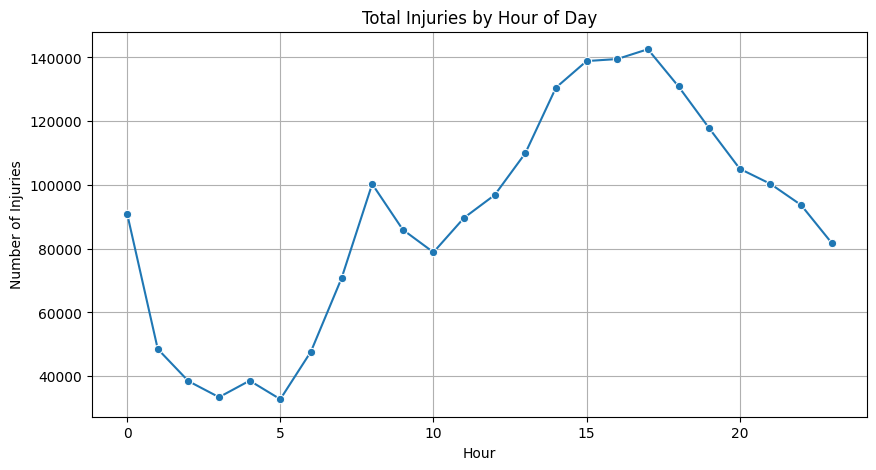

In [ ]:
# Extract hour if not created
df['CRASH_TIME'] = pd.to_datetime(df['CRASH_TIME'], errors='coerce')
df['HOUR'] = df['CRASH_TIME'].dt.hour

inj_by_hour = df.groupby('HOUR')['NUMBER OF PERSONS INJURED'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=inj_by_hour.index, y=inj_by_hour.values, marker='o')
plt.title("Total Injuries by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Injuries")
plt.grid(True)
plt.show()

# **Vehicle Type Bar Chart**

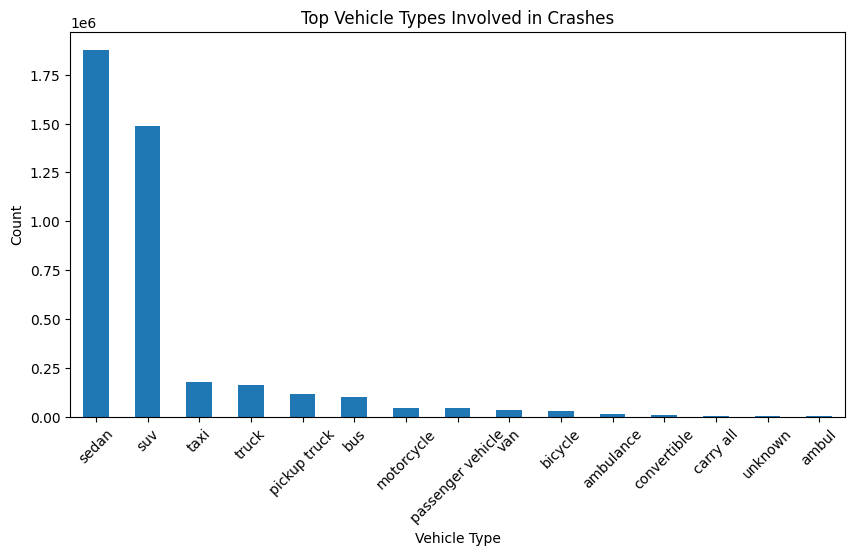

In [ ]:
#plt.figure(figsize=(10,5))
df['VEHICLE TYPE CODE 1'].value_counts().head(15).plot(kind='bar')
plt.title("Top Vehicle Types Involved in Crashes")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# **Contributing Factor Frequency Analysis**

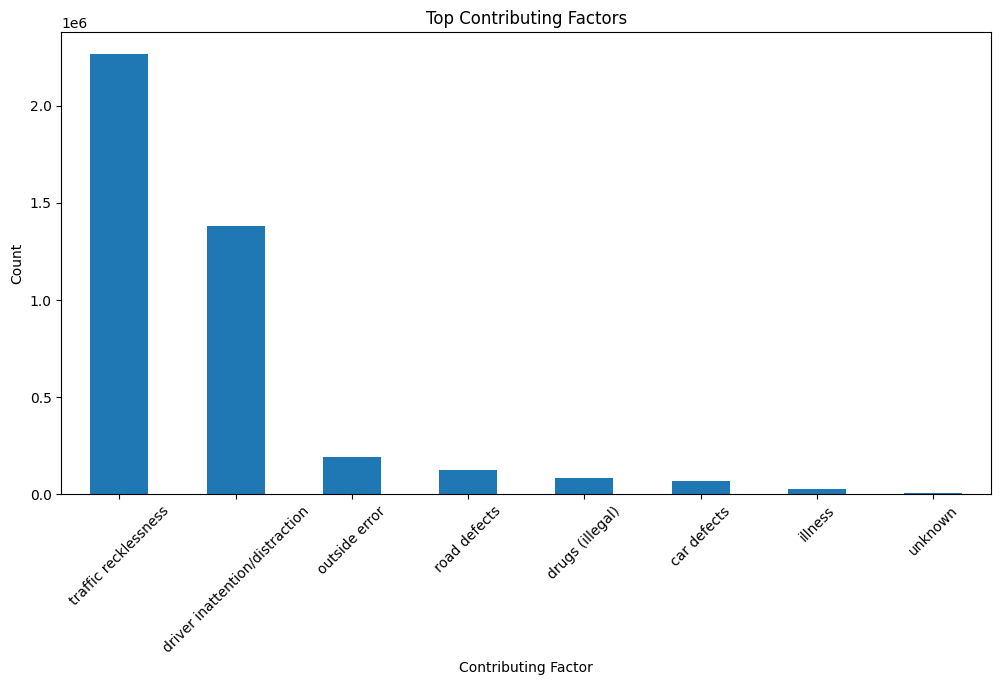

In [ ]:
plt.figure(figsize=(12,6))
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(15).plot(kind='bar')
plt.title("Top Contributing Factors")
plt.xlabel("Contributing Factor")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# **Missing Data Summary**


In [ ]:
missing_after_merge = (
    df.isnull().sum()
    .to_frame("Missing")
    .assign(Percent=lambda x: (x['Missing'] / len(df) * 100).round(2))
    .sort_values(by="Missing", ascending=False)
)
missing_after_merge.head(20)


,Missing,Percent
SAFETY_EQUIPMENT,2126102,51.17
POSITION_IN_VEHICLE,1982342,47.71
EMOTIONAL_STATUS,1914274,46.07
BODILY_INJURY,1914250,46.07
COMPLAINT,1914243,46.07
ON STREET NAME,880405,21.19
VEHICLE_ID,156368,3.76
PED_ROLE,81637,1.96
BOROUGH,37314,0.90
VEHICLE TYPE CODE 1,15129,0.36


# **Advanced EDA**

# **Crashes per Year**


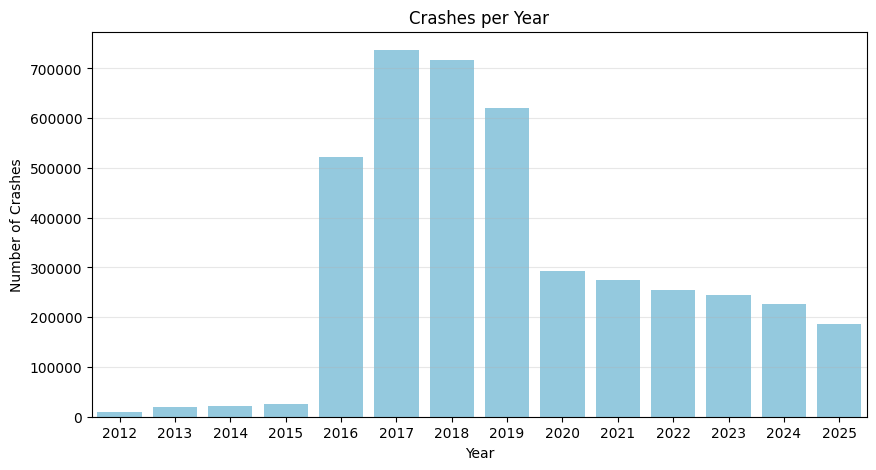

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

df['YEAR'] = df['CRASH_DATE'].dt.year

crashes_per_year = df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=crashes_per_year.index, y=crashes_per_year.values, color='skyblue')
plt.title("Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(axis='y', alpha=0.3)
plt.show()

# **Crash Severoty Distribution**


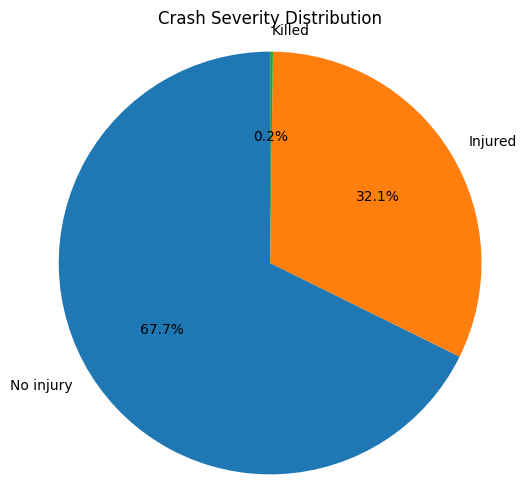

In [ ]:
import matplotlib.pyplot as plt

no_injury = len(df[(df['NUMBER OF PERSONS INJURED'] == 0) &
                  (df['NUMBER OF PERSONS KILLED'] == 0)])

injured = len(df[(df['NUMBER OF PERSONS INJURED'] > 0) &
                (df['NUMBER OF PERSONS KILLED'] == 0)])

killed = len(df[df['NUMBER OF PERSONS KILLED'] > 0])

labels = ['No injury', 'Injured', 'Killed']
sizes = [no_injury, injured, killed]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Crash Severity Distribution")
plt.axis('equal')
plt.show()

# **Pedestrian vs Cyclist vs Motorist injury trends**


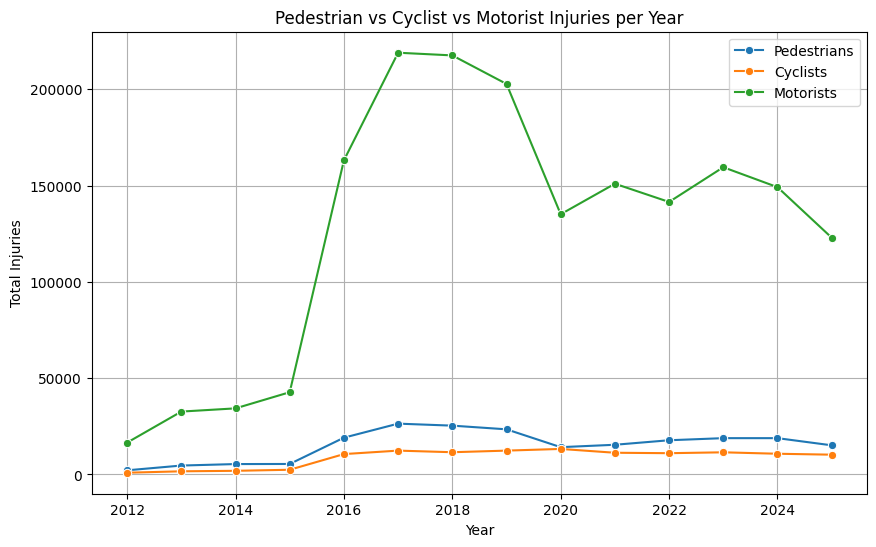

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')
df['YEAR'] = df['CRASH_DATE'].dt.year

inj_trends = df.groupby('YEAR').agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF MOTORIST INJURED': 'sum'
}).reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=inj_trends, x='YEAR',
             y='NUMBER OF PEDESTRIANS INJURED',
             marker='o', label='Pedestrians')
sns.lineplot(data=inj_trends, x='YEAR',
             y='NUMBER OF CYCLIST INJURED',
             marker='o', label='Cyclists')
sns.lineplot(data=inj_trends, x='YEAR',
             y='NUMBER OF MOTORIST INJURED',
             marker='o', label='Motorists')

plt.title("Pedestrian vs Cyclist vs Motorist Injuries per Year")
plt.xlabel("Year")
plt.ylabel("Total Injuries")
plt.grid(True)
plt.legend()
plt.show()

# **Crashes by Age Group**


/tmp/ipython-input-2396449134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')


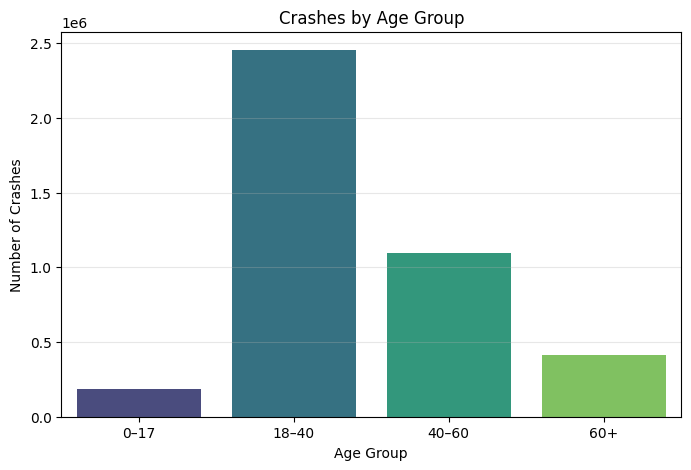

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df['PERSON_AGE'] >= 0]

bins = [0, 17, 40, 60, df['PERSON_AGE'].max()]
labels = ['0–17', '18–40', '40–60', '60+']

df['AGE_BIN'] = pd.cut(df['PERSON_AGE'],
                       bins=bins,
                       labels=labels,
                       include_lowest=True)

age_counts = df['AGE_BIN'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title("Crashes by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crashes")
plt.grid(axis='y', alpha=0.3)
plt.show()

# **Crashes by Hour and Borough**


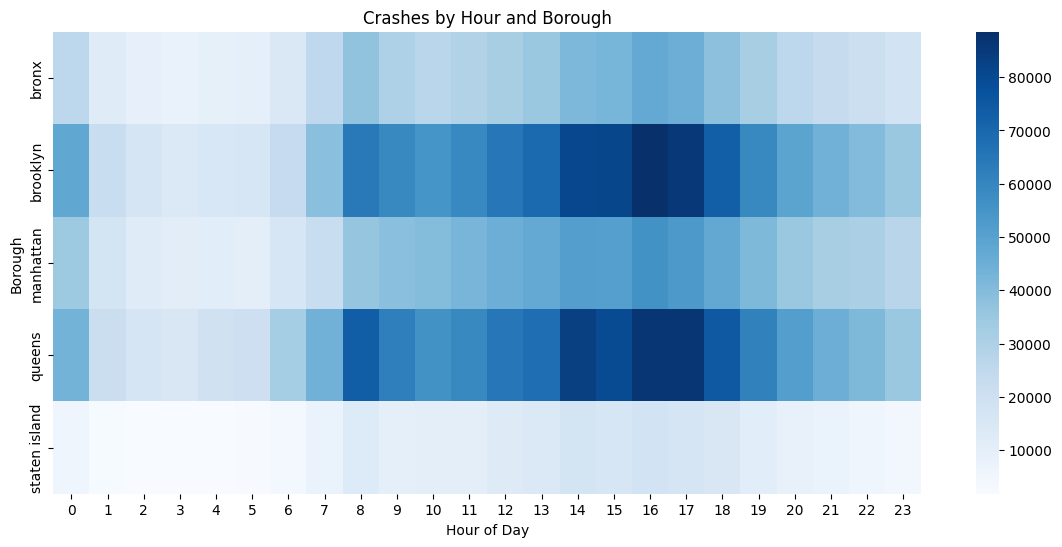

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['CRASH_TIME'] = pd.to_datetime(df['CRASH_TIME'], errors='coerce')
df['HOUR'] = df['CRASH_TIME'].dt.hour

hour_borough = df.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='COUNT')

pivot_hb = hour_borough.pivot(index='BOROUGH',
                              columns='HOUR',
                              values='COUNT').fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_hb, cmap='Blues')
plt.title("Crashes by Hour and Borough")
plt.xlabel("Hour of Day")
plt.ylabel("Borough")
plt.show()

In [ ]:
import plotly.express as px

df_map = df.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()

# df_map = df_map.sample(50000, random_state=42)

df_map['CRASH_COUNT'] = 1

fig = px.density_mapbox(
    df_map,
    lat='LATITUDE',
    lon='LONGITUDE',
    z='CRASH_COUNT',
    radius=8,
    center=dict(
        lat=df_map['LATITUDE'].mean(),
        lon=df_map['LONGITUDE'].mean()
    ),
    zoom=9,
    mapbox_style='open-street-map',
    title='Geographical Density of Crashes in NYC'
)

fig.show()

Buffered data was truncated after reaching the output size limit.